# CrosswordExtension
## 概要
このノートブックではクラスワード(スケルトンパズル)自動生成ツールの拡張機能について紹介します。

***

## Import
必要なライブラリをimportし, 日本語フォントの指定などを行う：

In [1]:
import os
import sys
import copy
import datetime
import time
import math
import itertools
import unicodedata
import collections
import pickle

import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display, HTML
import matplotlib.pyplot as plt

sys.path.append('../../python')
from src import Puzzle, Dictionary, Placeable, ObjectiveFunction, Optimizer

start = time.time()

***

## Pickleオブジェクトのオープン
ここでは、既に作成されたパズルデータを元に、様々な拡張機能について語ります。
そこで、今回は`pickle/sample.pickle`というpickleファイルをロードします。

In [2]:
with open("../pickle/sample.pickle", "rb") as f:
    sample_puzzle = pickle.load(f)
sample_puzzle.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,C,,C,e,m,p,a,k,a,,,,
1,,,h,,h,,,,,,,,,S,
2,S,a,o,l,a,,,,,,,C,,a,
3,,,i,,b,,,H,a,i,s,h,e,n,
4,I,n,-,f,a,,,a,,,,a,,b,
5,,,w,,,K,,g,,B,a,n,y,a,n
6,,M,a,t,m,o,,i,,,,-,,,
7,,,n,,,g,,b,,,,h,,H,
8,,,,,L,u,p,i,t,,G,o,n,i,
9,,,F,,,m,,s,,K,,m,,g,


これで生成済みのパズルデータをオープンすることができました。

---
## （番外編）解の軌跡をアニメーション化
解の軌跡をアニメーション化してみましょう。
パズルの巻き戻し・早送り機能を使って、作業履歴を最初から順番に画像化し、
外部ファイルを用いてそれを動画化します。

'rm' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
コマンドの構文が誤っています。


AttributeError: 'NoneType' object has no attribute 'copy'

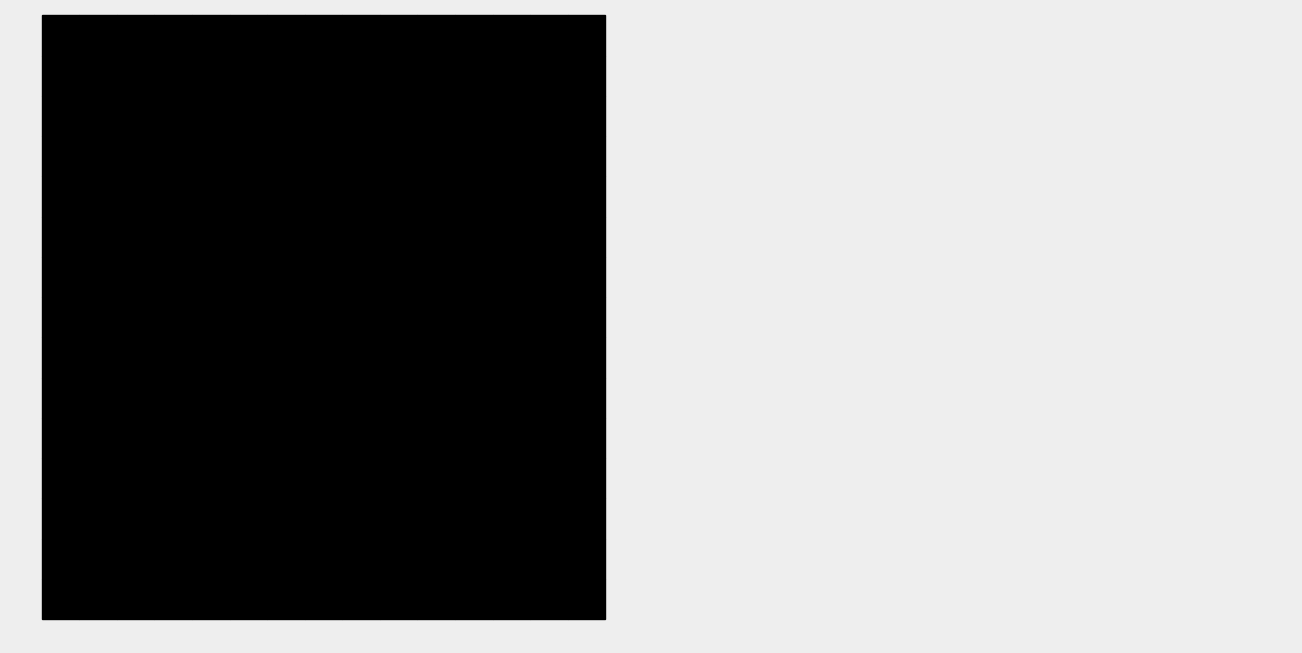

In [4]:
!rm -rf fig/animation
!mkdir fig/animation
tmpPuzzle = sample_puzzle.jump(0)
tmpPuzzle.saveAnswerImage(f"../fig/animation/0000.png")
for histNum in range(len(sample_puzzle.history)):
    tmpPuzzle = tmpPuzzle.getNext()
    tmpPuzzle.saveAnswerImage(f"../fig/animation/{str(histNum+1).zfill(4)}.png")

動画化にはmovie_maker.pyを用います。コマンドライン引数で画像が入ったディレクトリとFPSを指定します。

In [ ]:
!python ../python/script/movie_maker.py "../fig/animation/" -o "../fig/animation/out.mp4" -f 10 -c mp4v

これで、fig/animation内にout.mp4という動画ファイルが作成されました。
再生してみましょう。

In [ ]:
import io
import base64

video = io.open('../fig/animation/out.mov', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="out" controls>
                <source src="data:fig/animation/out.mov;base64,{0}" type="video/mov" />
             </video>'''.format(encoded.decode('utf-8')))

video = io.open('../fig/animation/out.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))